In [27]:
import networkx as nx
from networkx.algorithms import bipartite

In [28]:
B = nx.Graph()

In [29]:
B.add_node(1, bipartite=0)

In [30]:
list1 = [2,3,4,5]
B.add_nodes_from(list1, bipartite=0)

In [31]:
B.add_nodes_from(['a', 'b', 'c', 'd'], bipartite=1)

In [32]:
print(B.nodes(data=True))

[(1, {'bipartite': 0}), (2, {'bipartite': 0}), (3, {'bipartite': 0}), (4, {'bipartite': 0}), (5, {'bipartite': 0}), ('a', {'bipartite': 1}), ('b', {'bipartite': 1}), ('c', {'bipartite': 1}), ('d', {'bipartite': 1})]


In [33]:
circles = {node for node, att in B.nodes(data=True) if att['bipartite']==0}
actors = set(B) - circles

In [34]:
print(circles)
print(actors)

{1, 2, 3, 4, 5}
{'c', 'd', 'b', 'a'}


In [35]:
B.add_edge(2, 'c')
import random
r_edge_list = [(random.choice(list(circles)), random.choice(list(actors))) for i in range(15)]

In [36]:
B.add_edges_from(r_edge_list)

In [37]:
print(B.edges())

[(1, 'b'), (1, 'a'), (2, 'c'), (2, 'a'), (3, 'd'), (3, 'b'), (3, 'c'), (4, 'a'), (5, 'd'), (5, 'c'), (5, 'b')]


In [38]:
print(len(B.edges()))

11


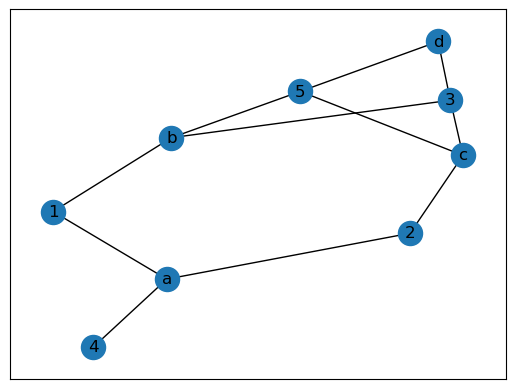

In [39]:
nx.draw_networkx(B)

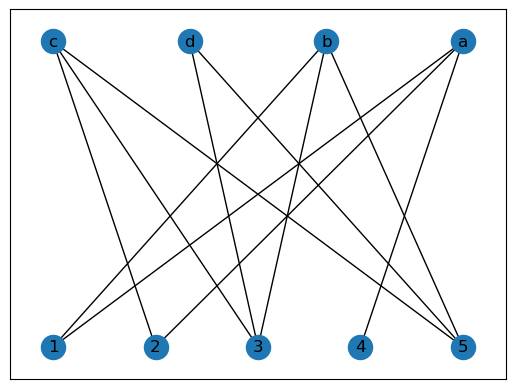

In [40]:
nx.draw_networkx(B,pos=nx.bipartite_layout(B, circles, align='horizontal'))

In [20]:
circles_size, actors_activ = bipartite.degrees(B, actors)

In [21]:
print(circles_size)

[(1, 1), (2, 2), (3, 0), (4, 2), (5, 2)]


In [22]:
print(actors_activ)

[('c', 2), ('d', 2), ('b', 3), ('a', 0)]


In [41]:
print(B.nodes['c'])
print(B.degree['c'])

{'bipartite': 1}
3


In [42]:
Gs = bipartite.projected_graph(B, actors)
Gm = bipartite.projected_graph(B,actors, 'MultiGraph')
Gw = bipartite.weighted_projected_graph(B, actors)

In [44]:
print(Gs.degree())
print(Gm.degree())
print(Gw.degree())
print(Gw.degree(weight="weight"))

[('c', 3), ('d', 2), ('b', 3), ('a', 2)]
[('c', 5), ('d', 4), ('b', 5), ('a', 2)]
[('c', 3), ('d', 2), ('b', 3), ('a', 2)]
[('c', 5), ('d', 4), ('b', 5), ('a', 2)]


In [46]:
# load 2 mode network 
import pandas as pd
df = pd.read_csv('fb_split.csv')
df

,Person,Friendships
0,184,1
1,344,1
2,635,1
3,867,1
4,1296,1
...,...,...
26995,11462,326
26996,11525,326
26997,11590,326
26998,11707,326


In [47]:
person = list(df['Person'])
friendships = list(df['Friendships'])

In [48]:
set_person = set(person)
set_friendships = set(friendships)

In [50]:
print(len(set_person))
print(len(set_friendships))

11138
326


In [55]:
def create_from_edgelist(top,bottom):
    B = nx.Graph()
    for i in range(len(top)):
        B.add_node(top[i], bipartite=0)
        B.add_node(bottom[i], bipartite=1)
        B.add_edge(top[i], bottom[i])
    return B

In [56]:
B = create_from_edgelist(person,friendships)

In [57]:
print(len(B.nodes))

11345


In [58]:
print(len(B.edges))

27000


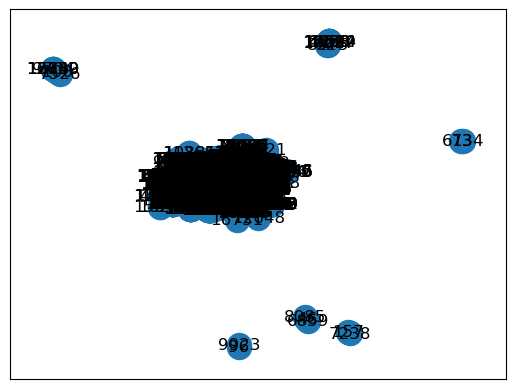

In [59]:
nx.draw_networkx(B)

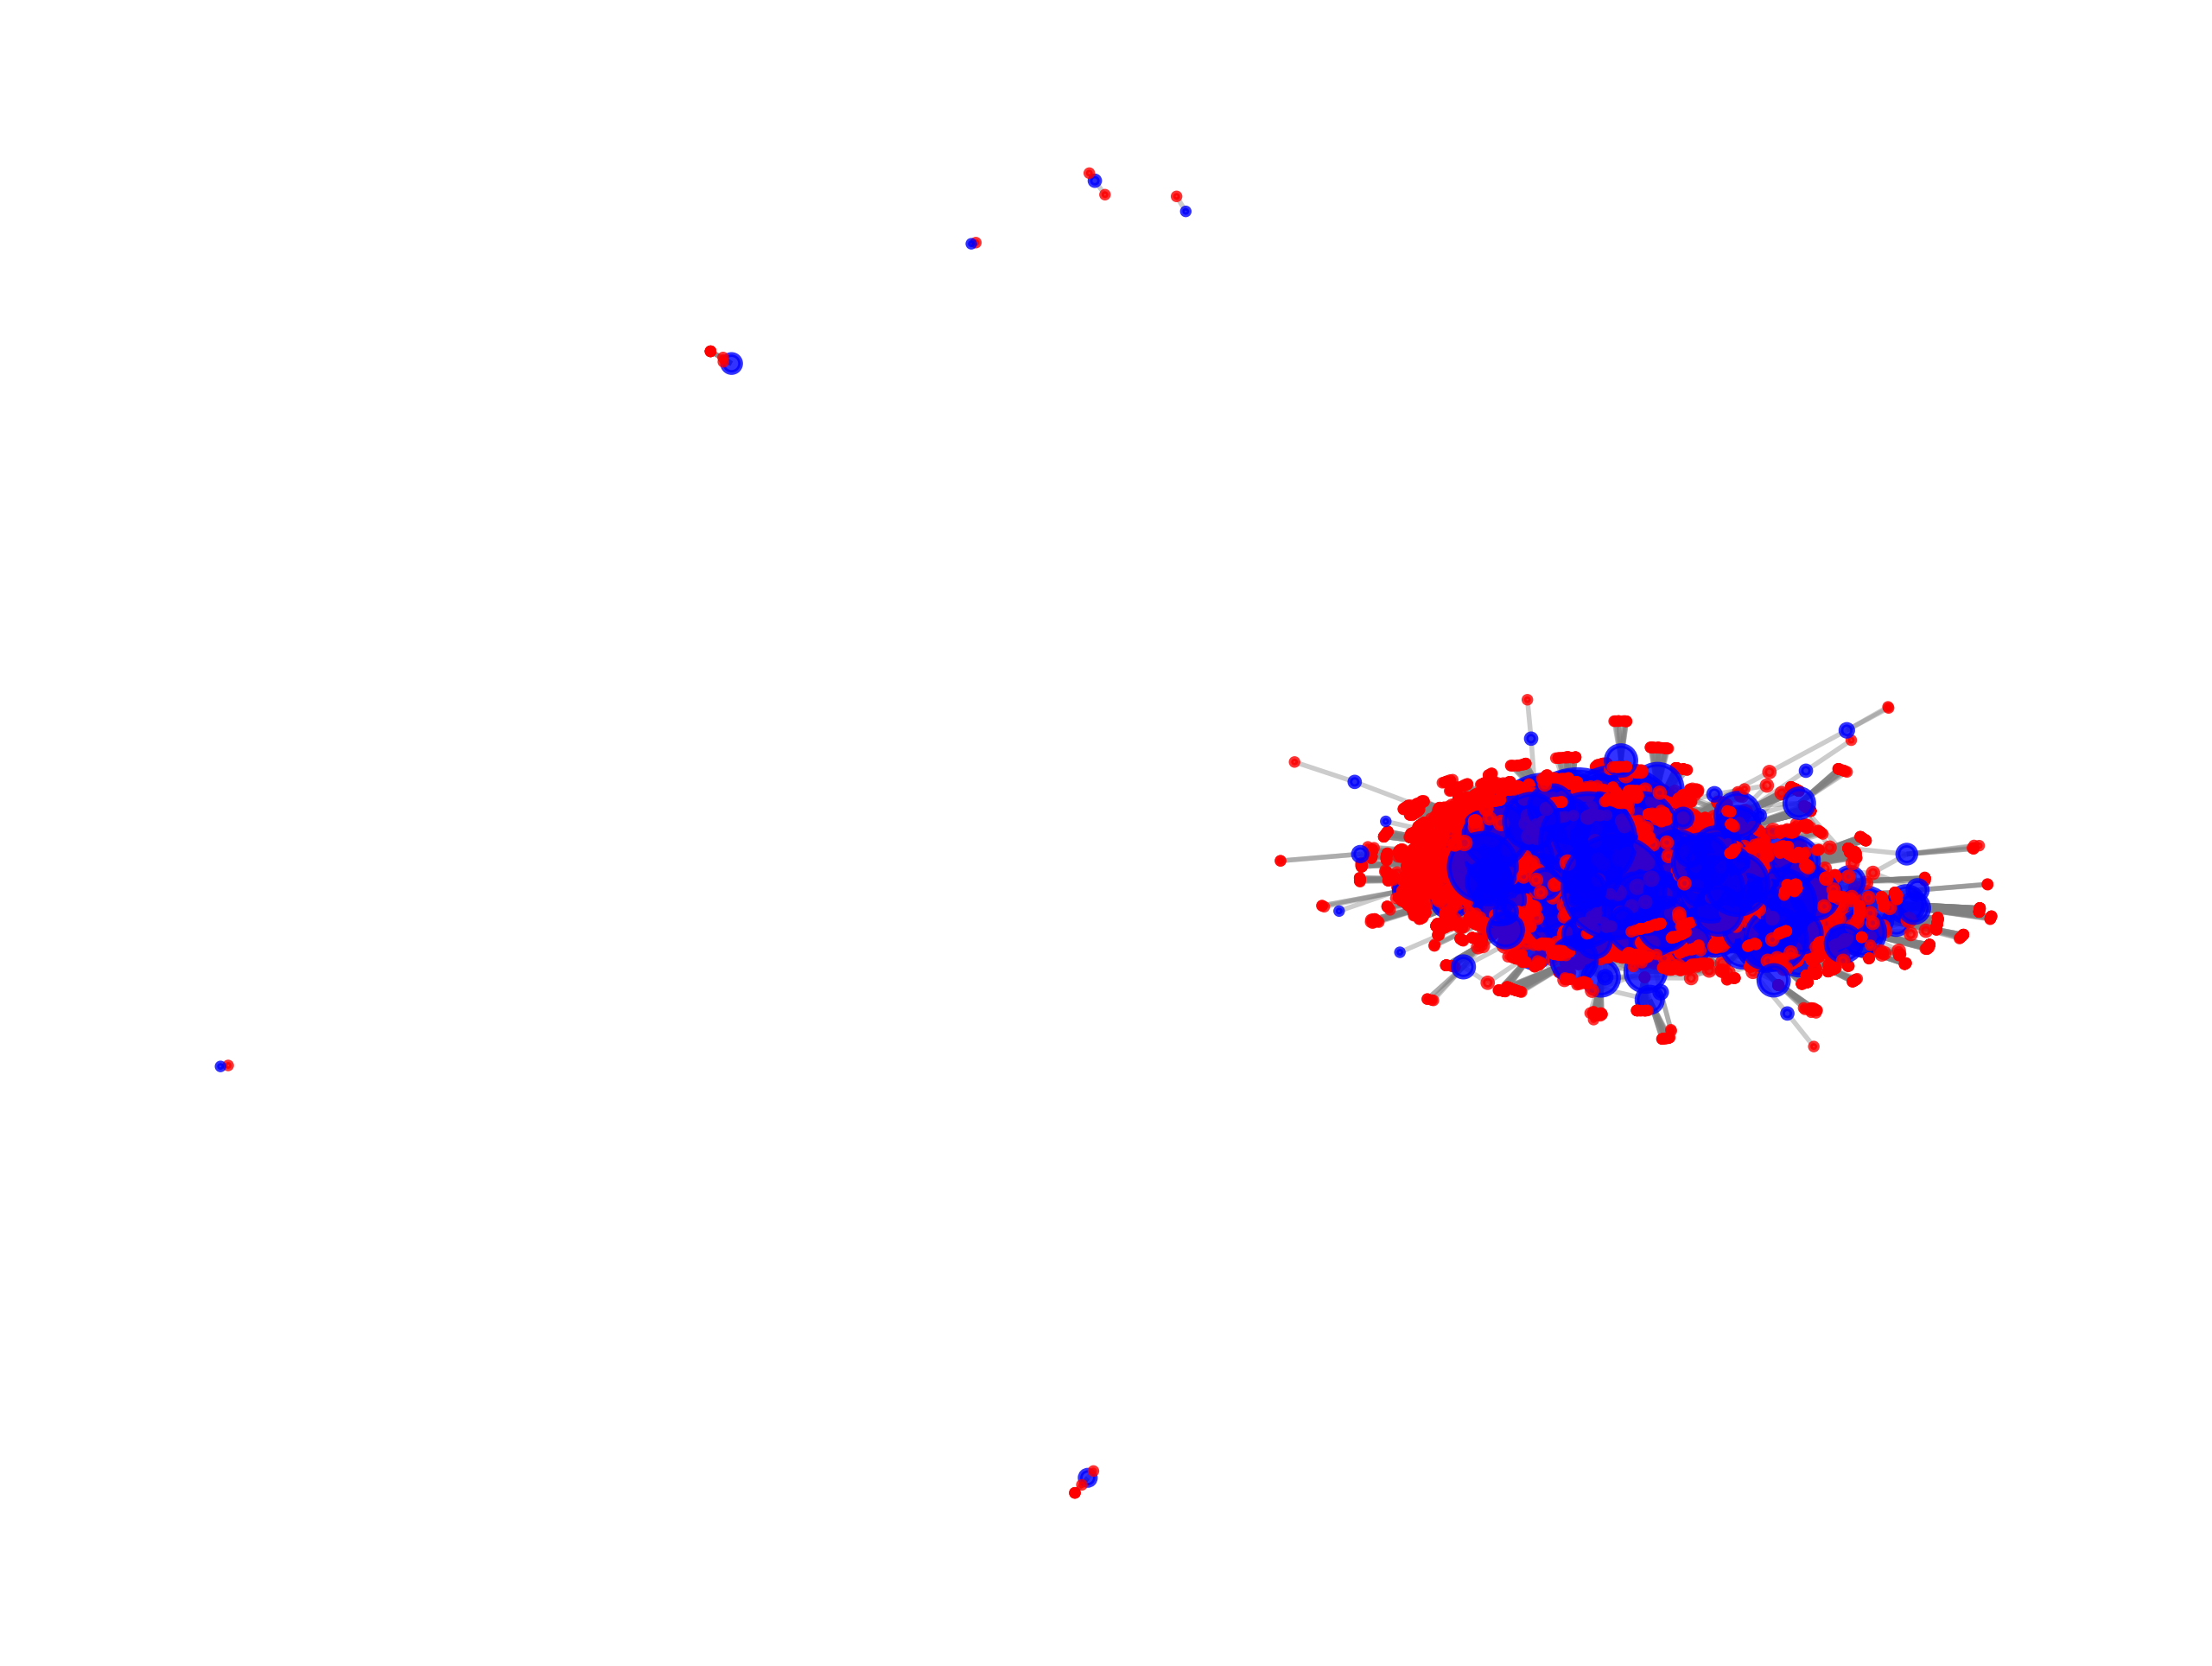

In [64]:
import matplotlib.pyplot as plt
isolates = [person for Person in person if B.degree(person)==0]
B.remove_nodes_from(isolates)

f = plt.figure(1,figsize=(8,6), dpi=400)

# defining layout
pos = nx.spring_layout(B)

colors = {0:'r', 1:'b'}

# nodes
nx.draw_networkx_nodes(B, pos=pos, \
                      node_size=[B.degree[node]*2 for node in B], \
                      alpha=0.8, \
                      node_color=[colors[B.nodes[node]['bipartite']] for node in B])

# links
nx.draw_networkx_edges(B, pos=pos, alpha=0.4, \
                      edge_color = 'gray')
plt.axis('off')
plt.show()